# Model E + Epochs 75 + Batch Size 4 + Histogram Equalization


 Train : 894 Images

 Valid : 75 Images

In [2]:
!nvidia-smi

Wed Apr 16 22:35:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P8              7W /  320W |     312MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch

print("number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4080 SUPER


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device : ', device)

using device :  cuda


In [5]:
import os
HOME = os.getcwd()
print(HOME)

c:\5025211148\YOLOv9-Segmentation


In [6]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
Setup complete  (32 CPUs, 63.8 GB RAM, 235.5/476.5 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [9]:
%pip install --user roboflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key="R66BD6MEFMOCLYffXdn9")
project = rf.workspace("mcab").project("merge-inez")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to merge-inez-2 in yolov9:: 100%|██████████| 1947/1947 [00:00<00:00, 3418.66it/s]


In [8]:
%cd {HOME}


c:\5025211148\YOLOv9-Segmentation


In [9]:
import cv2
import os
import numpy as np
from tqdm import tqdm

In [10]:
model = YOLO("yolov9e-seg.pt")

In [11]:
model.info()

YOLOv9e-seg summary: 1,261 layers, 60,512,800 parameters, 0 gradients, 248.4 GFLOPs


(1261, 60512800, 0, 248.4070912)

In [15]:
result = model.train(data="C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\data.yaml", epochs=75, imgsz=640, batch=4)

New https://pypi.org/project/ultralytics/8.3.109 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
engine\trainer: task=segment, mode=train, model=yolov9e-seg.pt, data=C:\5025211148\YOLOv9-Segmentation\merge-inez-2\data.yaml, epochs=75, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train39, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

train: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-2\train\labels... 894 images, 0 backgrounds, 0 corrupt: 100%|██████████| 894/894 [00:00<00:00, 1035.76it/s]

train: New cache created: C:\5025211148\YOLOv9-Segmentation\merge-inez-2\train\labels.cache



val: Scanning C:\5025211148\YOLOv9-Segmentation\merge-inez-2\valid\labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 587.04it/s]

val: WARNING  C:\5025211148\YOLOv9-Segmentation\merge-inez-2\valid\images\slice_234_jpg.rf.eb2e606d563bb126a736a6f9d73e7cd0.jpg: 1 duplicate labels removed
val: New cache created: C:\5025211148\YOLOv9-Segmentation\merge-inez-2\valid\labels.cache


Plotting labels to runs\segment\train39\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 307 weight(decay=0.0), 323 weight(decay=0.0005), 322 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train39
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/75      7.03G      1.343      2.342      1.588      1.601          4        640: 100%|██████████| 224/224 [00:42<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.45it/s]

                   all         75        150      0.516      0.537      0.311      0.134      0.426       0.22      0.162     0.0576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/75      7.15G      1.306       2.13      1.159      1.602          3        640: 100%|██████████| 224/224 [00:38<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]

                   all         75        150      0.228       0.26      0.221     0.0847      0.258        0.2      0.189     0.0624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/75      7.15G      1.277      2.001      1.083      1.574          8        640: 100%|██████████| 224/224 [00:38<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.47it/s]

                   all         75        150     0.0019    0.00667   0.000231   2.31e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/75      7.16G      1.217      2.083      0.986      1.536          9        640: 100%|██████████| 224/224 [00:37<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.35it/s]

                   all         75        150      0.873       0.52      0.592      0.343      0.804      0.586      0.642      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/75      6.53G      1.132      1.874     0.8333      1.449          4        640: 100%|██████████| 224/224 [00:37<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.54it/s]

                   all         75        150      0.816      0.767        0.8       0.56       0.85      0.794      0.825      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/75      7.22G        1.1      1.812     0.7856      1.415          8        640: 100%|██████████| 224/224 [00:36<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.06it/s]

                   all         75        150      0.763       0.84      0.881      0.584      0.755      0.833      0.874      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/75      6.51G      1.078      1.747     0.7484      1.404          5        640: 100%|██████████| 224/224 [00:37<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.50it/s]

                   all         75        150      0.826      0.722      0.869      0.592      0.838      0.729      0.898      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/75      7.17G      1.042      1.709     0.6756      1.366          7        640: 100%|██████████| 224/224 [00:36<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.46it/s]

                   all         75        150      0.885        0.7      0.766      0.572      0.875      0.693      0.756      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/75       6.5G      1.027        1.7     0.6834      1.361          9        640: 100%|██████████| 224/224 [00:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.52it/s]

                   all         75        150      0.857       0.72      0.811      0.581      0.867      0.727      0.812      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/75      7.13G      1.017      1.683     0.6787      1.334         10        640: 100%|██████████| 224/224 [00:36<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.24it/s]

                   all         75        150      0.892      0.811      0.857      0.594      0.883      0.805      0.851      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/75      6.53G      1.027      1.665     0.6666      1.348         10        640: 100%|██████████| 224/224 [00:36<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.60it/s]

                   all         75        150      0.911      0.793      0.868      0.628      0.907       0.81      0.881      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/75      7.14G      1.005      1.594     0.6405      1.337         13        640: 100%|██████████| 224/224 [00:38<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.52it/s]

                   all         75        150       0.83      0.807      0.834      0.601       0.88      0.767      0.837      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/75      7.15G     0.9839       1.56     0.6109      1.326         15        640: 100%|██████████| 224/224 [00:36<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]

                   all         75        150      0.884      0.879      0.889      0.598      0.898      0.892       0.91      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/75      7.25G     0.9819      1.581     0.5978      1.312          6        640: 100%|██████████| 224/224 [00:38<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.61it/s]

                   all         75        150      0.818      0.827       0.79      0.586      0.852       0.86      0.843      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/75      6.52G     0.9658      1.591     0.5914      1.309         12        640: 100%|██████████| 224/224 [00:37<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.46it/s]

                   all         75        150      0.874      0.753      0.859      0.617      0.874      0.753      0.861      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/75      6.53G     0.9475      1.515     0.5726      1.292          8        640: 100%|██████████| 224/224 [00:37<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.59it/s]


                   all         75        150      0.893      0.873      0.898      0.628      0.893      0.873      0.895      0.599

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/75      7.16G     0.9299      1.542     0.5544       1.28         13        640: 100%|██████████| 224/224 [00:36<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.38it/s]

                   all         75        150      0.923      0.614      0.669      0.532      0.923      0.614      0.669      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/75       6.6G     0.9351      1.519     0.5539      1.277         12        640: 100%|██████████| 224/224 [00:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.43it/s]

                   all         75        150      0.882      0.846      0.898      0.636      0.897       0.86      0.916      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/75      7.25G     0.9324      1.538     0.5431      1.269         11        640: 100%|██████████| 224/224 [00:36<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.42it/s]

                   all         75        150      0.929      0.765      0.832      0.577      0.958       0.78      0.849      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/75      6.52G       0.93      1.483     0.5334      1.271          3        640: 100%|██████████| 224/224 [00:37<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.14it/s]

                   all         75        150      0.878       0.88      0.871      0.623      0.933      0.933       0.94      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/75      7.16G     0.9236      1.495     0.5339      1.267          6        640: 100%|██████████| 224/224 [00:38<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.33it/s]

                   all         75        150      0.849      0.794      0.817      0.589      0.873      0.816      0.842      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/75      7.13G     0.9094      1.456     0.5167      1.259          9        640: 100%|██████████| 224/224 [00:37<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.26it/s]

                   all         75        150      0.877      0.867      0.852      0.609      0.936        0.9      0.918      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/75      6.54G     0.9182      1.506     0.5183      1.268         11        640: 100%|██████████| 224/224 [00:37<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.53it/s]

                   all         75        150      0.841       0.44      0.584      0.338      0.688      0.607      0.644      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/75      7.16G     0.9148      1.473     0.5197      1.266          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.33it/s]

                   all         75        150       0.87      0.838      0.897      0.625      0.919      0.868      0.928      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/75      6.53G      0.902      1.427     0.4996      1.247          8        640: 100%|██████████| 224/224 [00:37<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.33it/s]


                   all         75        150      0.889      0.915      0.916      0.641      0.908      0.934      0.938      0.622

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/75      7.16G     0.9145      1.446     0.5095      1.269          6        640: 100%|██████████| 224/224 [00:37<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.35it/s]

                   all         75        150      0.864       0.86      0.866      0.617      0.889       0.84      0.871      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/75      6.52G     0.8835      1.424       0.49      1.246          8        640: 100%|██████████| 224/224 [00:37<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.29it/s]

                   all         75        150       0.91      0.917        0.9       0.63      0.917      0.923      0.916      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/75      7.16G     0.8763      1.401     0.4794      1.239         10        640: 100%|██████████| 224/224 [00:37<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.40it/s]

                   all         75        150      0.852      0.898      0.885      0.618      0.869      0.917      0.914      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/75      7.15G     0.8761        1.4     0.4764      1.236          9        640: 100%|██████████| 224/224 [00:37<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.13it/s]

                   all         75        150      0.888      0.941      0.927      0.651      0.922      0.927      0.927      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/75      7.14G     0.8762      1.409     0.4789      1.228          8        640: 100%|██████████| 224/224 [00:38<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.55it/s]

                   all         75        150      0.876      0.883      0.877      0.614      0.909      0.879       0.89      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/75      7.14G     0.8728      1.433     0.4766      1.229          8        640: 100%|██████████| 224/224 [00:37<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.08it/s]

                   all         75        150      0.892      0.911      0.928      0.644      0.919      0.903       0.93      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/75      7.16G     0.8629      1.383     0.4564      1.218          4        640: 100%|██████████| 224/224 [00:36<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.53it/s]

                   all         75        150       0.89      0.933      0.928      0.662      0.902      0.927      0.921      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/75      7.16G     0.8681       1.39      0.466      1.219          8        640: 100%|██████████| 224/224 [00:37<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.32it/s]

                   all         75        150      0.855       0.86      0.865      0.641      0.885      0.887      0.905      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/75      7.13G     0.8514      1.354     0.4564      1.206          7        640: 100%|██████████| 224/224 [00:37<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.58it/s]

                   all         75        150       0.86      0.903      0.885      0.627      0.878      0.922      0.902      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/75      7.16G     0.8513      1.363     0.4443      1.193          6        640: 100%|██████████| 224/224 [00:37<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.41it/s]

                   all         75        150      0.903       0.82      0.868      0.607      0.932      0.833      0.891      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/75      6.53G     0.8496      1.368     0.4528       1.21          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.56it/s]

                   all         75        150       0.86      0.862      0.857      0.635      0.902      0.867      0.894      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/75      7.17G     0.8599      1.368     0.4415      1.213         13        640: 100%|██████████| 224/224 [00:36<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.43it/s]

                   all         75        150       0.91      0.927      0.913      0.647       0.91      0.927      0.916      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/75      7.16G     0.8594      1.332     0.4432      1.217          4        640: 100%|██████████| 224/224 [00:36<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.47it/s]

                   all         75        150      0.837      0.836      0.858      0.648      0.854      0.843      0.881      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/75      7.24G     0.8339      1.332     0.4282      1.185         10        640: 100%|██████████| 224/224 [00:38<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.44it/s]

                   all         75        150      0.898      0.907      0.906      0.641      0.918      0.927      0.919      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/75       6.5G     0.8335      1.316     0.4248      1.202          9        640: 100%|██████████| 224/224 [00:37<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.02it/s]

                   all         75        150      0.872      0.887      0.892      0.641       0.89      0.872      0.899      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/75      7.17G     0.8422      1.345     0.4425      1.212          7        640: 100%|██████████| 224/224 [00:38<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.44it/s]

                   all         75        150      0.862      0.869      0.874      0.656      0.916      0.847      0.899      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/75      7.24G     0.8267      1.297     0.4143      1.188          9        640: 100%|██████████| 224/224 [00:37<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.11it/s]

                   all         75        150      0.905      0.888       0.91      0.665      0.933      0.914      0.939      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/75       6.5G     0.8189      1.346     0.4188      1.177          8        640: 100%|██████████| 224/224 [00:36<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.39it/s]


                   all         75        150      0.863      0.933      0.916      0.666      0.887      0.933      0.931       0.64

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/75      6.51G     0.8201       1.32     0.4197      1.195          7        640: 100%|██████████| 224/224 [00:37<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.37it/s]

                   all         75        150      0.867      0.871      0.886      0.644      0.897      0.853      0.888      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/75      7.25G     0.8252      1.324     0.4218      1.184         13        640: 100%|██████████| 224/224 [00:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.54it/s]

                   all         75        150      0.869       0.82      0.833      0.642      0.932      0.855      0.881      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/75      7.14G     0.8077      1.298     0.4067      1.174         10        640: 100%|██████████| 224/224 [00:36<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.25it/s]

                   all         75        150       0.85      0.907        0.9      0.649      0.911      0.907      0.922      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/75      7.16G     0.8222      1.327     0.4103      1.182          5        640: 100%|██████████| 224/224 [00:36<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.89it/s]

                   all         75        150        0.9      0.867      0.906      0.674      0.915       0.88       0.92       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/75      7.16G     0.8073      1.297     0.3994      1.167          9        640: 100%|██████████| 224/224 [00:38<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.52it/s]

                   all         75        150      0.868       0.94      0.905      0.672      0.915      0.933      0.932      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/75      6.53G     0.8024      1.285     0.4016       1.17          7        640: 100%|██████████| 224/224 [00:37<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.48it/s]

                   all         75        150      0.911      0.913      0.929      0.672      0.911      0.933      0.923      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/75      7.16G     0.8141      1.295     0.3995      1.172          4        640: 100%|██████████| 224/224 [00:36<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.40it/s]

                   all         75        150       0.85      0.867      0.886      0.619      0.931      0.873      0.934      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/75      7.16G     0.8079      1.317     0.4045      1.176          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.41it/s]

                   all         75        150      0.931       0.88      0.911      0.662      0.926      0.873      0.901      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/75      7.13G     0.7928      1.268     0.3941      1.162          8        640: 100%|██████████| 224/224 [00:36<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.38it/s]

                   all         75        150      0.919      0.947      0.939      0.683      0.919      0.947      0.945      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/75      6.54G     0.7987      1.276     0.3944      1.152          4        640: 100%|██████████| 224/224 [00:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.39it/s]

                   all         75        150      0.918      0.873      0.908      0.661      0.918      0.873      0.906       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/75      7.16G     0.7721      1.239     0.3816      1.141          9        640: 100%|██████████| 224/224 [00:37<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.56it/s]

                   all         75        150      0.904      0.918      0.917      0.664      0.909       0.92      0.923      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/75      7.16G     0.7639      1.243     0.3688       1.14         10        640: 100%|██████████| 224/224 [00:36<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.48it/s]

                   all         75        150      0.911      0.887      0.925      0.664      0.904       0.88      0.915      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/75      6.61G     0.7753      1.261     0.3825      1.154         11        640: 100%|██████████| 224/224 [00:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.91it/s]

                   all         75        150      0.921      0.925      0.935      0.646      0.915      0.926      0.933      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/75      6.52G     0.7602      1.241     0.3755      1.147         12        640: 100%|██████████| 224/224 [00:38<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]


                   all         75        150      0.897      0.947      0.932      0.667      0.903      0.953      0.942      0.649

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/75      6.53G     0.7578      1.232      0.369      1.136         13        640: 100%|██████████| 224/224 [00:38<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.29it/s]

                   all         75        150      0.903      0.907       0.92       0.66      0.897       0.92      0.921      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/75      6.54G     0.7569      1.212      0.365      1.135          4        640: 100%|██████████| 224/224 [00:38<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.43it/s]

                   all         75        150      0.891      0.827      0.885      0.663      0.901      0.827      0.891      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/75      7.25G     0.7604      1.221     0.3651      1.136          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.27it/s]

                   all         75        150      0.826      0.847      0.854      0.667      0.863      0.873      0.893      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/75       6.5G     0.7463      1.198     0.3622      1.127          4        640: 100%|██████████| 224/224 [00:37<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.10it/s]

                   all         75        150      0.911      0.867      0.912      0.675      0.926       0.88      0.927      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/75      7.15G     0.7541      1.216     0.3626      1.135          6        640: 100%|██████████| 224/224 [00:37<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.17it/s]

                   all         75        150      0.845      0.853       0.87      0.656      0.861      0.867      0.887      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/75      7.15G     0.7395      1.202     0.3572      1.118          6        640: 100%|██████████| 224/224 [00:37<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.43it/s]

                   all         75        150      0.903      0.913      0.907      0.667      0.903      0.913       0.91      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/75      6.51G      0.746        1.2     0.3631      1.129          6        640: 100%|██████████| 224/224 [00:37<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.09it/s]

                   all         75        150      0.904      0.918      0.924      0.671      0.917      0.932      0.936      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/75      7.14G     0.7364      1.184      0.352      1.117          3        640: 100%|██████████| 224/224 [00:38<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.43it/s]

                   all         75        150       0.91       0.92      0.932      0.685      0.896      0.907      0.914      0.647


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/75      6.51G     0.7661      1.217      0.347      1.169          4        640: 100%|██████████| 224/224 [00:38<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.18it/s]

                   all         75        150      0.934      0.893      0.911      0.669      0.926      0.887      0.898      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/75      7.16G      0.744      1.189     0.3401      1.157          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.96it/s]


                   all         75        150      0.921      0.913      0.908      0.658      0.928       0.92      0.918      0.633

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/75      7.16G     0.7326      1.184     0.3336      1.143          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.33it/s]

                   all         75        150      0.911      0.933      0.916      0.681      0.914      0.933      0.914      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/75      7.24G     0.7156      1.155     0.3259       1.12          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.30it/s]

                   all         75        150      0.928      0.933      0.913      0.658      0.921      0.927      0.911      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/75      6.52G     0.7141      1.152     0.3225      1.123          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]

                   all         75        150      0.918       0.92      0.904      0.663      0.924      0.927      0.919       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      71/75      7.16G     0.7066      1.148     0.3163      1.114          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]

                   all         75        150      0.912      0.899      0.899      0.657      0.906      0.893      0.897      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      72/75      7.16G     0.6922      1.126     0.3123      1.094          4        640: 100%|██████████| 224/224 [00:37<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.22it/s]

                   all         75        150      0.894      0.907      0.887      0.655      0.894      0.907      0.895      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      73/75      6.62G     0.6941      1.142     0.3158      1.118          4        640: 100%|██████████| 224/224 [00:37<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.00it/s]

                   all         75        150      0.892      0.915      0.906      0.662      0.892      0.915      0.904      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      74/75      7.16G     0.6865      1.118     0.3103      1.116          4        640: 100%|██████████| 224/224 [00:38<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.44it/s]

                   all         75        150      0.923      0.927      0.924      0.668      0.917       0.92      0.918      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      75/75      6.52G     0.6836      1.131     0.3137      1.104          4        640: 100%|██████████| 224/224 [00:37<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.49it/s]

                   all         75        150      0.909      0.913        0.9      0.669      0.916      0.919      0.907      0.645



75 epochs completed in 0.852 hours.
Optimizer stripped from runs\segment\train39\weights\last.pt, 121.9MB
Optimizer stripped from runs\segment\train39\weights\best.pt, 121.9MB

Validating runs\segment\train39\weights\best.pt...
Ultralytics YOLOv8.2.98  Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 16376MiB)
YOLOv9e-seg summary (fused): 714 layers, 59,683,222 parameters, 0 gradients, 244.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.73it/s]


                   all         75        150      0.916      0.947      0.939      0.684      0.919      0.947      0.944      0.663
                    ab         75         75       0.99          1      0.995      0.953      0.991          1      0.995      0.914
                    mc         75         75      0.841      0.893      0.883      0.415      0.847      0.893      0.893      0.412
Speed: 0.3ms preprocess, 10.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\segment\train39



image 1/1 C:\5025211148\YOLOv9-Segmentation\merge-inez-2\valid\images\slice_172_jpg.rf.acfd2c323039d94667dcdcea6e7c177b.jpg: 640x640 1 ab, 1 mc, 18.6ms
Speed: 0.0ms preprocess, 18.6ms inference, 102.3ms postprocess per image at shape (1, 3, 640, 640)


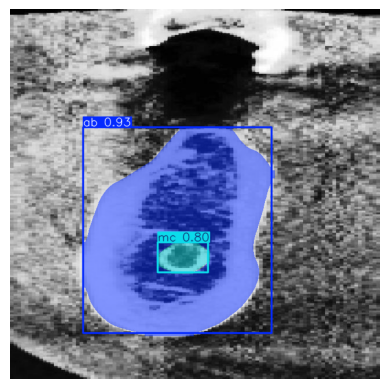

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from ultralytics import YOLO

model = YOLO("C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train39\\weights\\best.pt")  # load a custom model

# Predict with the model
results = model("C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\\slice_172_jpg.rf.acfd2c323039d94667dcdcea6e7c177b.jpg")


predicted_img = results[0].plot()
output_dir = "C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\predict"
os.makedirs(output_dir, exist_ok=True)

output_image_path = os.path.join(output_dir, "predicted.jpg")

cv2.imwrite(output_image_path, predicted_img)

predicted_img_rgb = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)

plt.imshow(predicted_img_rgb)
plt.axis('off')  # Hilangkan sumbu
plt.show()

In [13]:
model_path = r'C:\\5025211148\\YOLOv9-Segmentation\\runs\\segment\\train39\\weights\\best.pt'
valid_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images'
ground_truth_path = r'C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\labels'
gt_AB_path = r"C:\\5025211148\\YOLOv9-Segmentation\\\\Dataset Train Val\\gt-AB"
gt_MC_path = r"C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC"

segmented_AB_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB'
segmented_AB_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_AB.npy'

segmented_MC_path = fr'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_path_2 = r'C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC'
segmented_MC_npy = r'C:\\5025211148\\YOLOv9-Segmentation\\yolov9c-segmented_MC.npy'

for path in [gt_AB_path, gt_MC_path, segmented_AB_path, segmented_MC_path]:
  os.makedirs(path, exist_ok=True)

In [14]:
import os
import re

# specify the directory path
directory_path = valid_path

# create an empty list to store the filenames with directory path
file_list = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'slice_(\d+)', s)  # Match 'slice_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list = sorted(file_list, key=extract_number)
for filename in file_list:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'slice_0', 'slice_1', 'slice_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_172_jpg.rf.acfd2c323039d94667dcdcea6e7c177b.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_173_jpg.rf.b9e1b17b4697611d091597dd9f59e5e4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_174_jpg.rf.8e3bd1ab96b8a4eae5c7e46862011bab.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_175_jpg.rf.8b503462c402251ccbd970c40827d7d6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_176_jpg.rf.50eb68f04baf0a696db3b4f6599ee596.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_177_jpg.rf.ee3601b4b3d3453d245101a0ad33f409.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_178_jpg.rf.57390a26cb4a8d9787fbf0e3c6283186.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-2\\valid\\images\slice_179_jpg.rf.04a88a39f5f4057591c02e2e68367897.jpg
C:\\5025211148\\YOLOv9-Segmentation\\merge-inez-

In [15]:
from ultralytics import YOLO

# Load a model
model = YOLO(model_path, task='segment')  # load a pretrained model (recommended for training)

In [16]:
results = model(file_list, save=True)


0: 640x640 1 ab, 1 mc, 787.6ms
1: 640x640 1 ab, 1 mc, 787.6ms
2: 640x640 1 ab, 1 mc, 787.6ms
3: 640x640 1 ab, 1 mc, 787.6ms
4: 640x640 1 ab, 1 mc, 787.6ms
5: 640x640 1 ab, 1 mc, 787.6ms
6: 640x640 1 ab, 1 mc, 787.6ms
7: 640x640 1 ab, 1 mc, 787.6ms
8: 640x640 1 ab, 1 mc, 787.6ms
9: 640x640 1 ab, 1 mc, 787.6ms
10: 640x640 1 ab, 1 mc, 787.6ms
11: 640x640 1 ab, 1 mc, 787.6ms
12: 640x640 1 ab, 1 mc, 787.6ms
13: 640x640 1 ab, 1 mc, 787.6ms
14: 640x640 1 ab, 1 mc, 787.6ms
15: 640x640 1 ab, 1 mc, 787.6ms
16: 640x640 1 ab, 1 mc, 787.6ms
17: 640x640 1 ab, 1 mc, 787.6ms
18: 640x640 1 ab, 1 mc, 787.6ms
19: 640x640 1 ab, 1 mc, 787.6ms
20: 640x640 1 ab, 1 mc, 787.6ms
21: 640x640 1 ab, 1 mc, 787.6ms
22: 640x640 1 ab, 1 mc, 787.6ms
23: 640x640 1 ab, 1 mc, 787.6ms
24: 640x640 1 ab, 2 mcs, 787.6ms
25: 640x640 1 ab, 4 mcs, 787.6ms
26: 640x640 1 ab, 3 mcs, 787.6ms
27: 640x640 1 ab, 2 mcs, 787.6ms
28: 640x640 1 ab, 1 mc, 787.6ms
29: 640x640 1 ab, 1 mc, 787.6ms
30: 640x640 1 ab, 1 mc, 787.6ms
31: 640x640 1

In [17]:
print(len(results))

75


In [18]:
import torch
import cv2
import numpy as np
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    boxes = result.boxes.data
    clss = boxes[:, 5]
    AB_indices = torch.where(clss == 0)
    AB_indices = (AB_indices[0][0].unsqueeze(0),)
    # AB_indices = AB_indices[0][0]
    print('class', clss)
    print('indices', AB_indices)
    # Convert mask to single channel image
    try:
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
    except Exception as e:
      print('error',e)
      # print('\n')
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_AB_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_AB_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_0.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_1.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_2.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_3.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_4.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\\merged_segs_5.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
C:\\5025211148

In [19]:
import os
import re

# specify the directory path
directory_path = segmented_AB_path_2

# create an empty list to store the filenames with directory path
file_list_AB = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_AB.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_AB = sorted(file_list_AB, key=extract_number)
for filename in file_list_AB:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_AB\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [20]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_AB]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_AB_npy, stacked_images)

(75, 200, 101)


In [21]:
import torch
import cv2
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    try:
      boxes = result.boxes.data
      clss = boxes[:, 5]
      AB_indices = torch.where(clss == 1)
      AB_indices = (AB_indices[0][0].unsqueeze(0),)
      # AB_indices = AB_indices[0][0]
      print('class', clss)
      print('indices', AB_indices)
      # Convert mask to single channel image
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      resized_mask = cv2.resize(mask, (101, 200))
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', resized_mask)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      print('ketemu')
    except Exception as e:
      print('error',e)
      width = 101
      height = 200
      black_image = np.zeros((height, width), dtype=np.uint8)
      print('tidak ada mc lo..')
      # Save the black image to a file
      cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
      print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
      i = i+1
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(fr'{segmented_MC_path}\\merged_segs_{i}.jpg', black_image)
    print(fr'{segmented_MC_path}\\merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_0.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_1.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_2.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_3.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_4.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\\merged_segs_5.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (ten

In [22]:
import os
import re

# specify the directory path
directory_path = segmented_MC_path_2

# create an empty list to store the filenames with directory path
file_list_MC = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_MC.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'merged_segs_(\d+)', s)  # Match 'merged_segs_' followed by one or more digits
    return int(match.group(1)) if match else float('inf')

file_list_MC = sorted(file_list_MC, key=extract_number)
for filename in file_list_MC:
    print(filename)
# print(file_list)  # Output: sorted file_list with filenames like 'merged_segs_0', 'merged_segs_1', 'merged_segs_2', etc.


C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_0.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_1.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_2.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_3.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_4.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_5.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_6.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_7.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_8.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_9.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_10.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_11.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_12.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segmented_MC\merged_segs_13.jpg
C:\\5025211148\\YOLOv9-Segmentation\\segment

In [23]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_MC]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save(segmented_MC_npy, stacked_images)

(75, 200, 101)


In [24]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_AB_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            class_1_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                    # Convert normalized coordinates to pixel coordinates
                    img_height, img_width, _ = img.shape
                    points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                    if class_label == 0:
                        class_0_points.extend(points)
                    elif class_label == 1:
                        class_1_points.extend(points)

            # Create numpy arrays of points for drawing the polygons
            polygon_points_0 = np.array(class_0_points)
            polygon_points_1 = np.array(class_1_points)

            # Draw the filled polygons on the mask
            if len(polygon_points_0) > 0:
                cv2.fillPoly(mask, [polygon_points_0], color=(0, 0, 0))
            if len(polygon_points_1) > 0:
                cv2.fillPoly(mask, [polygon_points_1], color=(255, 255, 255))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_AB = image_loader.load_images()


Saved resized output image for slice_172_jpg.rf.acfd2c323039d94667dcdcea6e7c177b.jpg as C:\\5025211148\\YOLOv9-Segmentation\\\\Dataset Train Val\\gt-AB\slice_172_jpg.rf.acfd2c323039d94667dcdcea6e7c177b_output.jpg
Saved resized output image for slice_173_jpg.rf.b9e1b17b4697611d091597dd9f59e5e4.jpg as C:\\5025211148\\YOLOv9-Segmentation\\\\Dataset Train Val\\gt-AB\slice_173_jpg.rf.b9e1b17b4697611d091597dd9f59e5e4_output.jpg
Saved resized output image for slice_174_jpg.rf.8e3bd1ab96b8a4eae5c7e46862011bab.jpg as C:\\5025211148\\YOLOv9-Segmentation\\\\Dataset Train Val\\gt-AB\slice_174_jpg.rf.8e3bd1ab96b8a4eae5c7e46862011bab_output.jpg
Saved resized output image for slice_175_jpg.rf.8b503462c402251ccbd970c40827d7d6.jpg as C:\\5025211148\\YOLOv9-Segmentation\\\\Dataset Train Val\\gt-AB\slice_175_jpg.rf.8b503462c402251ccbd970c40827d7d6_output.jpg
Saved resized output image for slice_176_jpg.rf.50eb68f04baf0a696db3b4f6599ee596.jpg as C:\\5025211148\\YOLOv9-Segmentation\\\\Dataset Train Val\\gt

In [25]:
import os
import cv2
import numpy as np

# Directory paths
img_path = valid_path
gt_path = ground_truth_path
output_path = gt_MC_path

# Ensure output directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Iterate over files in the image directory
for img_file in os.listdir(img_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):  # adjust based on your image format
        # Read the image
        img = cv2.imread(os.path.join(img_path, img_file))

        # Create a blank white image with the same dimensions as the original image
        mask = np.ones_like(img) * 255

        # Read the corresponding ground truth file
        gt_file = os.path.splitext(img_file)[0] + ".txt"  # assuming ground truth files have the same name as images
        gt_file_path = os.path.join(gt_path, gt_file)

        if os.path.exists(gt_file_path):
            class_0_points = []
            with open(gt_file_path, "r") as file:
                lines = file.readlines()
                for line in lines:
                    data = line.split()
                    class_label = int(data[0])
                    if class_label == 1:
                        points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
                        # Convert normalized coordinates to pixel coordinates
                        img_height, img_width, _ = img.shape
                        points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
                        class_0_points.extend(points)

            # Create a numpy array of points for drawing the polygon
            polygon_points = np.array(class_0_points)

            # Draw the filled polygon on the mask
            if len(polygon_points) > 0:
                cv2.fillPoly(mask, [polygon_points], color=(0, 0, 0))

            # Resize the output image to 101x200
            mask = 255 - mask
            mask_resized = cv2.resize(mask, (101, 200))

            # Save the output image as JPEG
            output_file = os.path.splitext(img_file)[0] + "_output.jpg"
            output_file_path = os.path.join(output_path, output_file)
            cv2.imwrite(output_file_path, mask_resized)

            print(f"Saved resized output image for {img_file} as {output_file_path}")
        else:
            print(f"No ground truth file found for {img_file}")

# image_loader = ImageLoader(output_path)
# gt_MC = image_loader.load_images()

Saved resized output image for slice_172_jpg.rf.acfd2c323039d94667dcdcea6e7c177b.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_172_jpg.rf.acfd2c323039d94667dcdcea6e7c177b_output.jpg
Saved resized output image for slice_173_jpg.rf.b9e1b17b4697611d091597dd9f59e5e4.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_173_jpg.rf.b9e1b17b4697611d091597dd9f59e5e4_output.jpg
Saved resized output image for slice_174_jpg.rf.8e3bd1ab96b8a4eae5c7e46862011bab.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_174_jpg.rf.8e3bd1ab96b8a4eae5c7e46862011bab_output.jpg
Saved resized output image for slice_175_jpg.rf.8b503462c402251ccbd970c40827d7d6.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_175_jpg.rf.8b503462c402251ccbd970c40827d7d6_output.jpg
Saved resized output image for slice_176_jpg.rf.50eb68f04baf0a696db3b4f6599ee596.jpg as C:\\5025211148\\YOLOv9-Segmentation\\Dataset Train Val\\gt-MC\slice_

In [26]:
import os
import cv2
import numpy as np
import re

def read_images_as_binary_sorted(path, threshold=127):
    image_list = []

    # Get all files in the folder
    files = os.listdir(path)

    # Sort files based on filenames
    sorted_files = sorted(files, key=sort_key)

    # Iterate over sorted files
    for file_name in sorted_files:
        # Check if the file is an image (you can adjust the condition based on your image formats)
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            # Read the image in grayscale
            image_path = os.path.join(path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                # Apply thresholding to convert grayscale to binary image
                _, binary_image = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)
                image_list.append(binary_image)
                # unique_values, counts = np.unique(binary_image, return_counts=True)
                # for value, count in zip(unique_values, counts):
                    # print(f"{value}: {count}")

    # Convert the list of images to a numpy array
    image_array = np.array(image_list)
    return image_array

def sort_key(file_name):
    parts = re.split(r'(\d+)', file_name)
    parts[1::2] = map(int, parts[1::2])  # Convert numeric parts to integers
    return parts

# Example usage:
# sorted_images = read_images_as_grayscale_sorted("/path/to/images")


In [27]:
# Example usage:
path_to_images = gt_AB_path
gt_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_AB.shape)

Shape of images array: (75, 200, 101)


In [28]:

# Example usage:
path_to_images = gt_MC_path
gt_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", gt_MC.shape)

Shape of images array: (75, 200, 101)


In [29]:

# Example usage:
path_to_images = segmented_AB_path
segmented_AB = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_AB.shape)

Shape of images array: (75, 200, 101)


In [30]:

# Example usage:
path_to_images = segmented_MC_path
segmented_MC = read_images_as_binary_sorted(path_to_images)
print("Shape of images array:", segmented_MC.shape)

Shape of images array: (75, 200, 101)


In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix


def calculate_iou(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0

    # print(gt.shape)
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    # unique_values, counts = np.unique(gt, return_counts=True)
    # for value, count in zip(unique_values, counts):
    #    print(f"{value}: {count}")
    # print(cm)
    intersection = np.diag(cm) #TN dan TP
    union = np.sum(cm, axis=0) + np.sum(cm, axis=1) - intersection
    # print(np.sum(cm, axis=0))
    # print(np.sum(cm, axis=1))
    # print(intersection)
    # iou = np.mean((intersection + 1e-10) / (union + 1e-10))
    # only calculate the iou for AB or MC thats why we use index [1] in intersection
    iou = (intersection[1] + 1e-10) / (union[1] + 1e-10)
    return iou

def calculate_dice_score(gt, pred):
    unique_gt = np.unique(gt)
    unique_pred = np.unique(pred)

    # If both gt and pred contain only one unique value and they are equal,
    # then IoU is 1
    if len(unique_gt) == len(unique_pred) == 1 and unique_gt[0] == unique_pred[0]:
        return 1.0
    cm = confusion_matrix(gt.flatten(), pred.flatten())
    intersection = np.diag(cm)
    union_dice = np.sum(cm, axis=0) + np.sum(cm, axis=1)
    # dice_score = np.mean(2 * (intersection + 1e-10) / (union_dice + 1e-10))
    dice_score = 2 * (intersection[1] + 1e-10) / (union_dice[1] + 1e-10)
    return dice_score

def calculate_average_iou_and_dice(gt_images, pred_images):
    num_images = gt_images.shape[0]
    iou_scores = []
    dice_scores = []

    for i in range(num_images):
        gt_image = gt_images[i]
        pred_image = pred_images[i]
        iou = calculate_iou(gt_image, pred_image)
        dice = calculate_dice_score(gt_image, pred_image)
        print(i,"iou:",iou)
        print(i,"dice:",dice)
        iou_scores.append(iou)
        dice_scores.append(dice)

    avg_iou = np.nanmean(iou_scores)  # Use np.nanmean to handle NaN values
    avg_dice = np.nanmean(dice_scores)  # Use np.nanmean to handle NaN values
    return avg_iou, avg_dice

# Example usage:
# gt_images and pred_images are numpy arrays containing grayscale images
# Each array should have shape (num_images, height, width)


In [32]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_AB, gt_AB)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
print()
# print("Average Dice Score:", avg_dice)

0 iou: 0.9467933491686473
0 dice: 0.9726695949243659
1 iou: 0.9356943150046614
1 dice: 0.9667790081848945
2 iou: 0.9409411764705896
2 dice: 0.9695720693417509
3 iou: 0.9439342677622053
3 dice: 0.9711586275484961
4 iou: 0.9522649780808584
4 dice: 0.9755489021956215
5 iou: 0.9468575588449418
5 dice: 0.972703477502194
6 iou: 0.9610294117647068
6 dice: 0.9801274840645047
7 iou: 0.9494602551521112
7 dice: 0.9740750062924871
8 iou: 0.9462444771723135
8 dice: 0.9723798713583179
9 iou: 0.9535512410911783
9 dice: 0.9762234243301173
10 iou: 0.9579232283464577
10 dice: 0.9785094885007041
11 iou: 0.9468216670789031
11 dice: 0.9726845381781353
12 iou: 0.9607361963190194
12 dice: 0.9799749687109014
13 iou: 0.9617094861660088
13 dice: 0.9804810477269994
14 iou: 0.9412493802677258
14 dice: 0.96973566594306
15 iou: 0.9373156342182907
15 dice: 0.9676437000380793
16 iou: 0.9548517520215649
16 dice: 0.9769045156842645
17 iou: 0.9337844369260528
17 dice: 0.9657585603599229
18 iou: 0.9457420924574222
18 dic

In [33]:
avg_iou, avg_dice = calculate_average_iou_and_dice(segmented_MC, gt_MC)
print("Average IOU:", avg_iou)
print("Average DSC:", avg_dice)
# print("Average Dice Score:", avg_dice)

0 iou: 0.8823529411765283
0 dice: 0.9375000000002767
1 iou: 0.8638497652582798
1 dice: 0.9269521410582048
2 iou: 0.8277511961723312
2 dice: 0.9057591623039514
3 iou: 0.8396226415095096
3 dice: 0.9128205128207916
4 iou: 0.8243243243244035
4 dice: 0.9037037037039743
5 iou: 0.8372093023256572
5 dice: 0.9113924050635667
6 iou: 0.8921568627451509
6 dice: 0.9430051813474241
7 iou: 0.8616071428572046
7 dice: 0.9256594724223199
8 iou: 0.8364485981309175
8 dice: 0.910941475827249
9 iou: 0.9138755980861656
9 dice: 0.9550000000002612
10 iou: 0.8590308370044674
10 dice: 0.924170616113999
11 iou: 0.8883720930233078
11 dice: 0.94088669950765
12 iou: 0.9141414141414576
12 dice: 0.9551451187337849
13 iou: 0.7881355932204287
13 dice: 0.8815165876779901
14 iou: 0.7581699346406019
14 dice: 0.8624535315987243
15 iou: 0.6608996539793561
15 dice: 0.7958333333335842
16 iou: 0.8229166666668511
16 dice: 0.9028571428577699
17 iou: 0.6840148698885933
17 dice: 0.8123620309053394
18 iou: 0.788888888888967
18 dice: